<h1>Multiple Linear Regression - Bike Sharing Case Study </h1>

Problem Statement:


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Essentially, the company wants —

To understand the factors affecting the demand for these shared bikes in the American market

To create a linear model that quantitatively relates demand levels with variables such as'weathersit' and 'season' etc

To know the accuracy of the model, i.e. how well these variables can predict demand levels



<h2>Step 1: Reading Understanding and Visualizing the Data </h2>

We will use NumPy and Pandas and read the dataset into dataframe.


In [1386]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [1387]:
bike_rentals = pd.read_csv("C:\\BikeSharing\\day.csv")

In [1388]:
# Check the head of the dataset
bike_rentals.rename(columns = {'yr':'yr_2019'}, inplace = True)
bike_rentals.head()

,instant,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1389]:
bike_rentals.shape


(730, 16)

In [1390]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr_2019     730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1391]:
bike_rentals.describe()

,instant,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Standardize the categorical variables -- As we can there are columns like 'season', 'weathersit' , 'mnth' ,'weekday' etc which has numeric values assigned they are nothing but categories identified by a number we will convert them back to appropriate string value as per the data dictionaty provided.

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [1392]:
# Assigning the seasons categories
bike_rentals.loc[(bike_rentals.season == 1),'season']='spring'
bike_rentals.loc[(bike_rentals.season == 2),'season']='summer'
bike_rentals.loc[(bike_rentals.season == 3),'season']='fall'
bike_rentals.loc[(bike_rentals.season == 4),'season']='winter'

#Assigning the months 
bike_rentals.loc[(bike_rentals.mnth == 1),'mnth']='Jan'
bike_rentals.loc[(bike_rentals.mnth == 2),'mnth']='Feb'
bike_rentals.loc[(bike_rentals.mnth == 3),'mnth']='Mar'
bike_rentals.loc[(bike_rentals.mnth == 4),'mnth']='Apr'

bike_rentals.loc[(bike_rentals.mnth == 5),'mnth']='May'
bike_rentals.loc[(bike_rentals.mnth == 6),'mnth']='June'
bike_rentals.loc[(bike_rentals.mnth == 7),'mnth']='July'
bike_rentals.loc[(bike_rentals.mnth == 8),'mnth']='Aug'

bike_rentals.loc[(bike_rentals.mnth == 9),'mnth']='Sep'
bike_rentals.loc[(bike_rentals.mnth == 10),'mnth']='Oct'
bike_rentals.loc[(bike_rentals.mnth == 11),'mnth']='Nov'
bike_rentals.loc[(bike_rentals.mnth == 12),'mnth']='Dec'

#Assigning the weekdays -- using -- https://www.timeanddate.com/date/week-numbers.html

bike_rentals.loc[(bike_rentals.weekday == 0),'weekday']='Monday'
bike_rentals.loc[(bike_rentals.weekday == 1),'weekday']='Tuesday'
bike_rentals.loc[(bike_rentals.weekday == 2),'weekday']='Wednesday'
bike_rentals.loc[(bike_rentals.weekday == 3),'weekday']='Thursday'
bike_rentals.loc[(bike_rentals.weekday == 4),'weekday']='Friday'
bike_rentals.loc[(bike_rentals.weekday == 5),'weekday']='Saturday'
bike_rentals.loc[(bike_rentals.weekday == 6),'weekday']='Sunday'

#Assigning the weathersit  

bike_rentals.loc[(bike_rentals.weathersit == 1),'weathersit']='Clear, Few clouds, Partly cloudy, Partly cloudy'
bike_rentals.loc[(bike_rentals.weathersit == 2),'weathersit']='Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
bike_rentals.loc[(bike_rentals.weathersit == 3),'weathersit']='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
bike_rentals.loc[(bike_rentals.weathersit == 4),'weathersit']='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'



In [1393]:
bike_rentals.head()

,instant,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h3> Visualising the Data - </h3>
    
The Libraries matplotlib and seaborn will be used here and can serve below purposes:

1)To check multicollinearity if it exists

2)To check if some predictor variables directly have a strong association/correlation with the outcome variable


In [1394]:
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Relationship between Contineous Numeric Variables and Target Variable</h3>
1)In order to understand whether there is a value of building a linear regression model the target variable 'cnt' should in some way be linearly related to some of the variables.

2)The second thing is to check the multicollinearlity among the independent variables.

To do this we will be visualizing the numeric variables on scatter plots

Numeric Variables : temp,atemp,hum,windspeed
<h4>We are not selecting 'registered','casual' because a dependent variable cannot be regressed with the variables which contributed to it (means added or deducted and so on) , it will result in high r2 </h4>

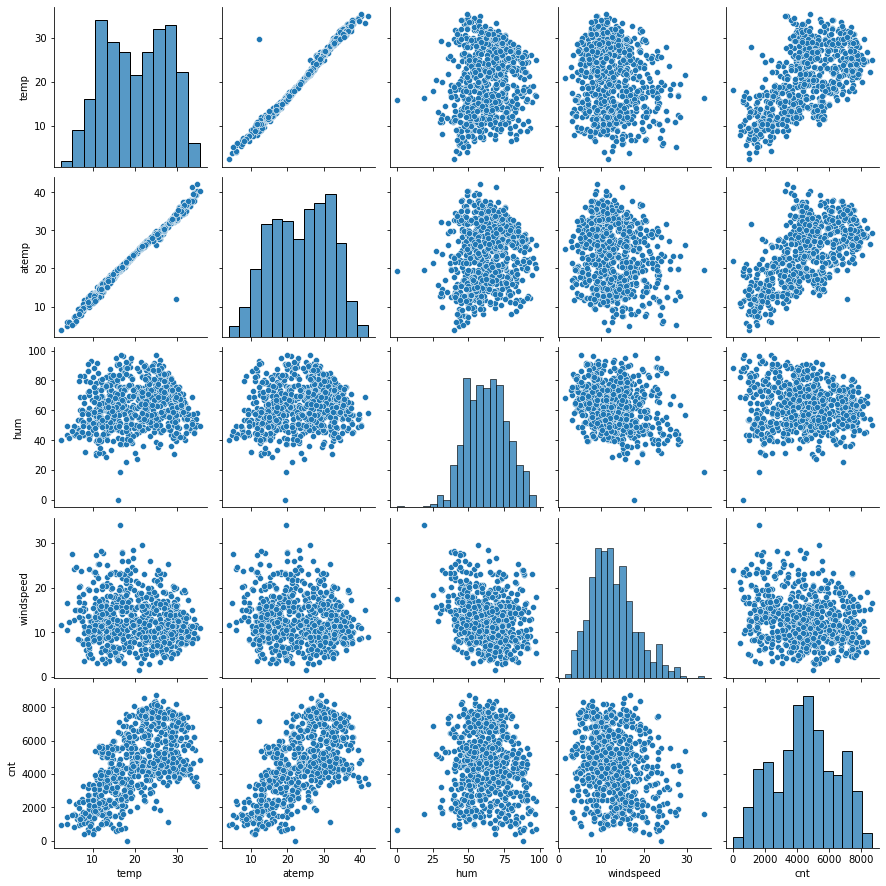

In [1395]:
bike_rentals = bike_rentals.drop('registered',axis=1 )
bike_rentals = bike_rentals.drop('casual',axis=1 )
bike_rentals_num  = bike_rentals[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_rentals_num)
plt.show()

<h4>Detecting multicollinearity</h4> -------
Obervation : The variables temp and atemp seems to be showing a strong positive correlation as can be seen from plots. To detail it further lets plot a heat map as well

In [1396]:
corr=bike_rentals_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


After plotting the correlation matrix we can see the pairwise correlation between all the variables. 
we can see that from the correlation matrix, quite a few variables are correlated to each other.
There is one pair of independent variables with more than 0.9 correlation which are temp and atemp.

<h4>Fixing Multicollinearity</h4>
So we will drop temp and pick atemp as it has higher correlation with target variable cnt.


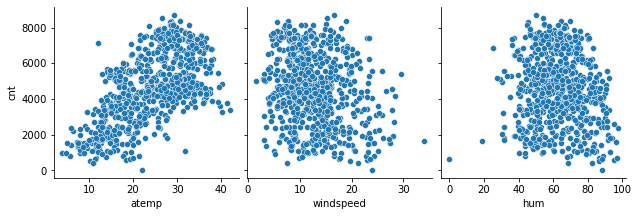

In [1397]:
bike_rentals = bike_rentals.drop('temp',axis=1 )
bike_rentals = bike_rentals.drop('dteday',axis=1 )
bike_rentals = bike_rentals.drop('instant',axis=1 )

sns.pairplot(bike_rentals, x_vars=['atemp','windspeed','hum'], y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()


Observation : The bike rentals do show some positive linear relation with  atemp , casual , registered predictor variables to an extent, but windspeed and humidity are not depiciting a clear linear relation. In a way bike rental bookings do get affected linearly by temp and atemp

SO WE SHOULD CONSIDER USING LINEAR REGRESSION AS SOME VARIABLES ARE LINEARLY RELATED TO TARGET VARIABLE

<h3>Relationship between Categorical Variables and Target variable </h3>


<h5>Categorical Variables</h5> : season,yr,mnth,holiday,weekday,workingday,weathersit

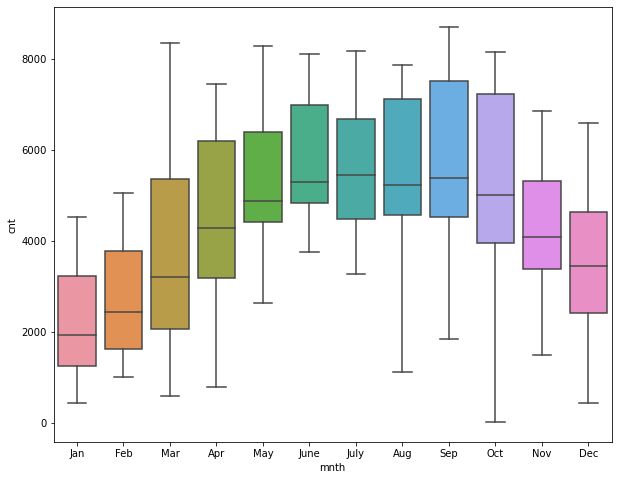

In [1398]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mnth',y='cnt',data=bike_rentals)
plt.show()

Observation : The overall trend of total number of bike rentals was generally on the higher end in the month of Sep and with max value crossing 8000+.Also the median is higher than other months mostly ( with exception of being comparable with July ).
So the rentals were high in sep compare to other months.

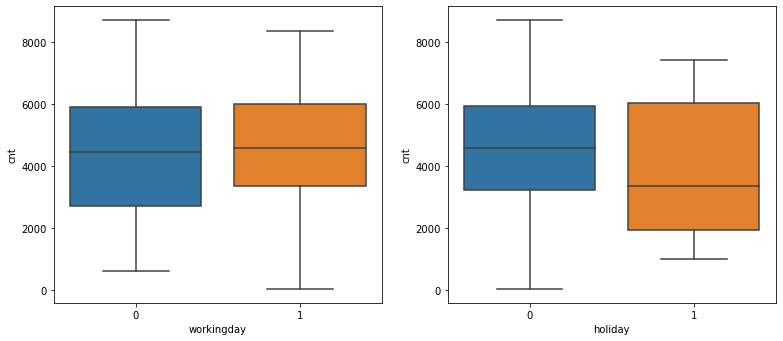

In [1399]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='workingday',y='cnt',data=bike_rentals)
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=bike_rentals)
plt.show()

Observation:

Workingday: The Overall bike rentals taken were comparable and its not a clear difference when there is working day or not.Although the 75 percentile on working day (1) the rentals are slightly high, but not remarkable.
The median values are comparable ( near)  too and 25 percentile is clearly lower when there is not a working day. 

Holiday: The median value is high where is no holiday (0) compared to a holiday(1) that means half of bike rentals crossed 4000+ mark on the dates when there was no holiday compared to rentals which were less than 4000 on holidays.
Also the overall trend for not a holiday (0) is on higher side ( high bike rentals ) with distribution not that broad compared to when there is a holiday.The max bike rentals taken were also when there was no holiday.
So people did took bikes more for rent on a non-holiday dates.

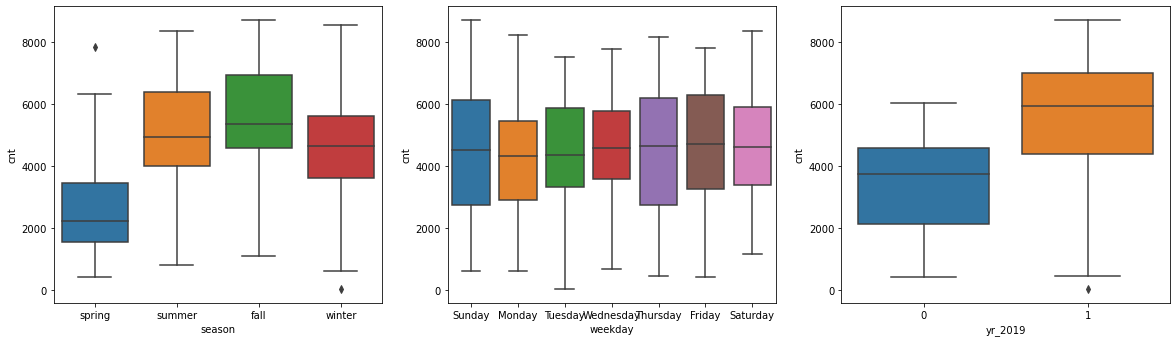

In [1400]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_rentals)
plt.subplot(2,3,2)
sns.boxplot(x='weekday',y='cnt',data=bike_rentals)
plt.subplot(2,3,3)
sns.boxplot(x='yr_2019',y='cnt',data=bike_rentals)
plt.show()

Season------------------
Observation: Fall season had maximum number of bikes being rented.

1)Spring: The overall spread is on the lower side when we talk about this season with median value of bike rentals taken just above 2000.The season show a low trend of bikes being rented out by people.

2)Summer: The trend of bikes being rented by people is better than spring as the median value is way high( around 5000 ) with overall distribution of data on a higher side compared to spring season.People definitely took bikes on rent more in summer compared to spring.

3)fall:The overall trend is better than summer and spring season with bike being rented more than 5000 on half of the times ( dates).Overall spread is on higher side too compared to spring and summer.So fall is the season where rentals were maximum.

4)winter: The bike rentals have showm a downward trend compared to summer and fall seasons but the distribution do overlap.But the trend is way better than spring season .

Weekday---------

The spread and distributions are comparable and overlap for all weekdays with median values being 4000 - 6000 rentals for all days

yr_2019 (Year) --  (0: 2018, 1:2019)

Obervation :The Trend is very clear when we compare 2019 vs 2018 as the bike being rented has increased significantly with below effects. 
- Median value of bike rentals in 2019 is comparable to max rentals in 2018
- The overall spread of data in 2019 is on higher side than means the rentals bookings overall went high compared to 2018

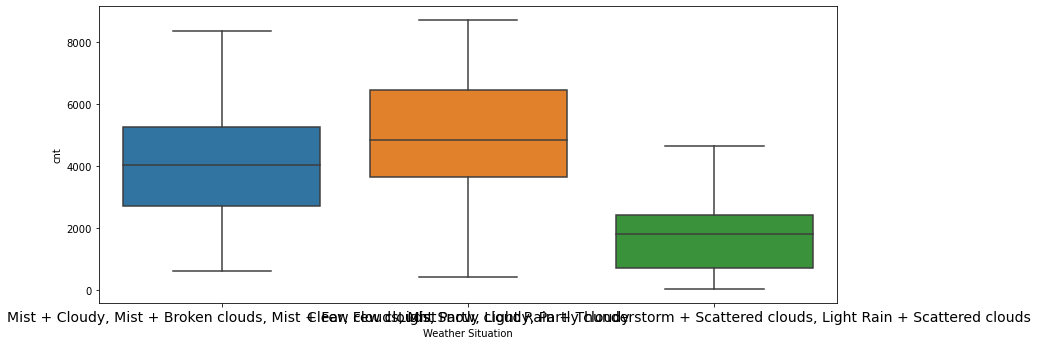

In [1401]:
plt.figure(figsize=(45, 12))
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_rentals)
plt.xticks(fontsize=14)
plt.xlabel("Weather Situation")
plt.show()

Weathersit -- Weather situation -------

Observation: When the weather is clear with few clouds the bike rental bookings are high.Obviously people would want to cycle less in rains or when there is visibility issues like mist/snow/thunderstrom.

Weather Situation1: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist : The rentals are less than when the weather is clear but high than rains/snow weather patterns


Weather Situation2:Clear, Few clouds, Partly cloudy, Partly cloudy  : Overall rental bookings trend is high with median value high than other weather situations.

Weather Situation3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds : The bookings are least in this weather situation as it is not a good condition to cycle in.

## Step - 2 Data Preparation

<h4> Encoding </h4>

We have some binary categorical variables already encoded as 0 and 1 like holiday workingday , so we do not need to encode them

But we need to take of other variables having multiple categorical values e.g season,	mnth,weekday,weathersit . We will convert them to dummy variables through encoding.

In [1402]:
varlist = ['season','mnth','weekday','weathersit' ]
bike_rentals[varlist].head()



,season,mnth,weekday,weathersit
0,spring,Jan,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,spring,Jan,Monday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,spring,Jan,Tuesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,spring,Jan,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,spring,Jan,Thursday,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [1403]:
#create dummy variables for season for n categoies we will create n-1 dummy vars 
#fall is represented by 0 0 0 
season_dummy = pd.get_dummies(bike_rentals['season'],drop_first=True)
bike_rentals=pd.concat([bike_rentals,season_dummy],axis=1)


In [1404]:
#create dummy variables for mnth for n categoies we will create n-1 dummy vars 
#Jan is represented by 0 0 0 ..........
mnth_dummy = pd.get_dummies(bike_rentals['mnth'])
bike_rentals=pd.concat([bike_rentals,mnth_dummy],axis=1)


In [1405]:
#create dummy variables for weekday for n categoies we will create n-1 dummy vars 
#Monday is represented by 0 0 0 ..........
weekday_dummy = pd.get_dummies(bike_rentals['weekday'])
bike_rentals=pd.concat([bike_rentals,weekday_dummy],axis=1)

In [1406]:
#create dummy variables for mnth for n categoies we will create n-1 dummy vars 
#Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is represented by 0 0  ..........
weathersit_dummy = pd.get_dummies(bike_rentals['weathersit'])
bike_rentals=pd.concat([bike_rentals,weathersit_dummy],axis=1)

Remove Unwanted Columns

In [1407]:
bike_rentals = bike_rentals.drop('mnth',axis=1 )
bike_rentals = bike_rentals.drop('Jan',axis=1 )
bike_rentals = bike_rentals.drop('season',axis=1 )
bike_rentals = bike_rentals.drop('weekday',axis=1 )
bike_rentals = bike_rentals.drop('weathersit',axis=1 )
bike_rentals = bike_rentals.drop('Monday',axis=1 )
bike_rentals = bike_rentals.drop('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',axis=1 )


In [1408]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   yr_2019                                                       730 non-null    int64  
 1   holiday                                                       730 non-null    int64  
 2   workingday                                                    730 non-null    int64  
 3   atemp                                                         730 non-null    float64
 4   hum                                                           730 non-null    float64
 5   windspeed                                                     730 non-null    float64
 6   cnt                                                           730 non-null    int64  
 7   spring                                                        730 non-n

<h5>Splitting into Train and Test Data</h5>

In [1409]:

df_train, df_test = train_test_split(bike_rentals, train_size=0.7 , random_state=100)


<h5>Rescaling the numeric features and not categorical variables</h5>

We see that compared to columns like temp,	atemp	,hum	,windspeed	,casual	,registered	,other columns have small integer values. So we need to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

1. Min-Max scaling  - Normalisation - Compresses all the data between 0 and 1 - good against outliers
2. Standardisation (mean-0, sigma-1) 

We will make use of MinMax scaling.

In [1410]:
scaler = MinMaxScaler()

#list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr_2019,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1411]:
df_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499
std,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.529718,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Observation : As you can see the min and max values are 0 and 1 for numeric variables.

## STEP 3 : Training the Model

Lets plot a heat map which will convey the correlations between all variables and will help find which ones are having high correlations

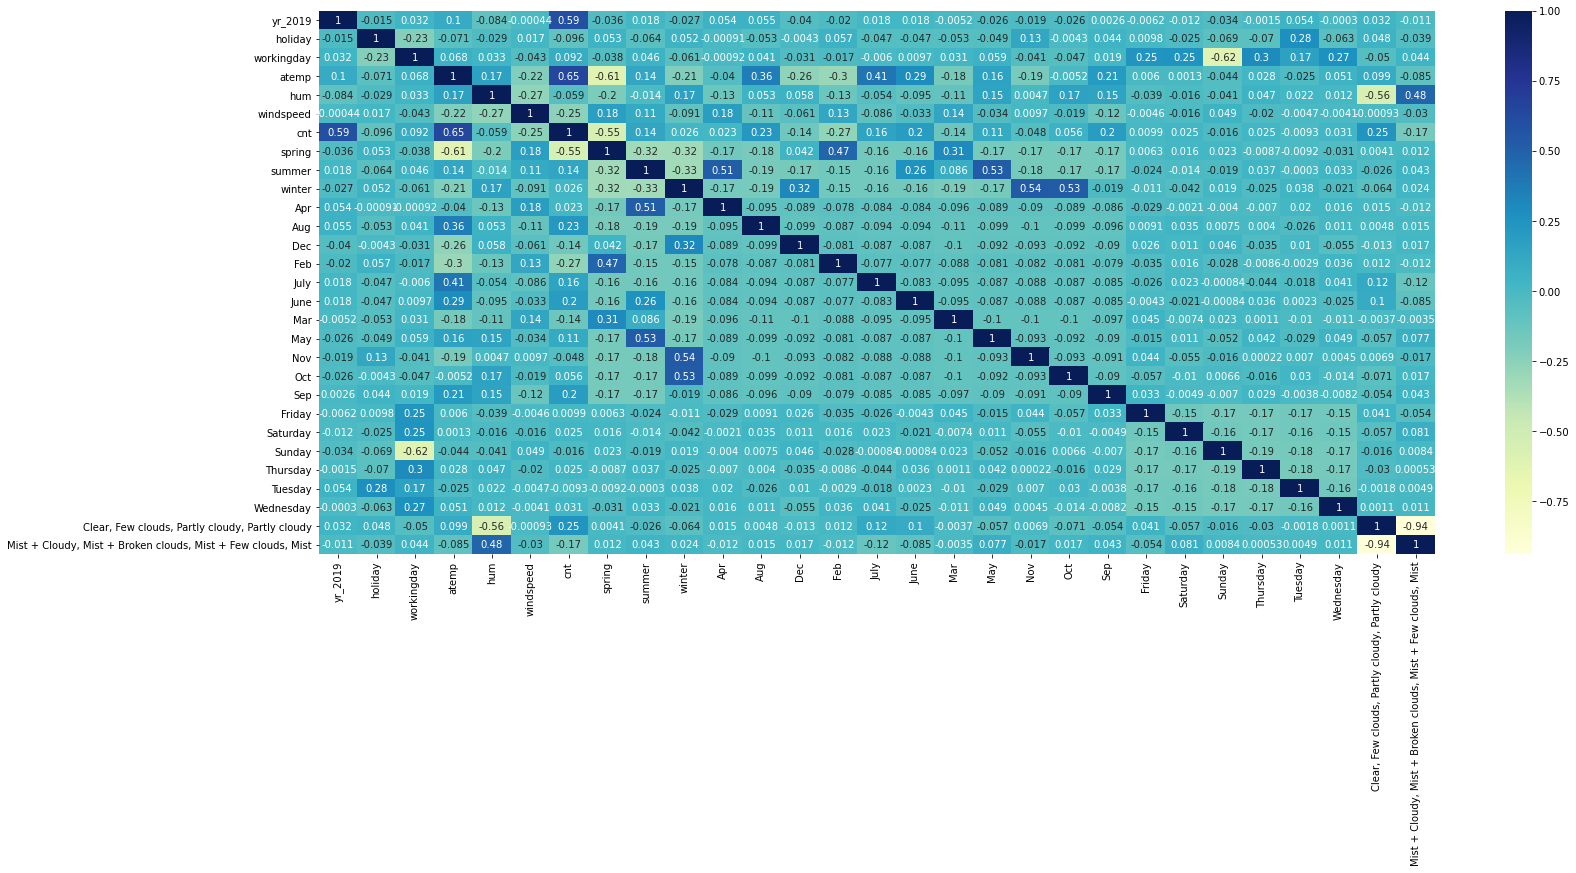

In [1412]:
plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1413]:
y_train = df_train.pop('cnt') # adding target variable
X_train = df_train # assign predictor variables

<H3> Using STATSMODEL Manual Approach  : Take all variables and start dropping insignificant ones</h3>

In [1414]:
X_train_sm = sm.add_constant(X_train)
#model creation

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary() # below .05 is low 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.07e-179
Time:                        17:39:25   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.0255      0.054     -0.472      0.637      -0.132       0.081
yr_2019                                                          0.2344      0.008     28.934      0.000       0.218       0.250
holiday                                                         -0.0358      0.024     -1.509      0.132      -0.082       0.011
workingday                                                       0.0434      0.009      4.594      0.000       0.025       0.062
atemp                                                            0.4160      0.045      9.174      0.000       0.327       0.505
hum                                                             -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                                                       -0.1683      0.026     -6.488      0.000      -0.219      -0.117
spring                                                          -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer                                                           0.0348      0.026      1.327      0.185      -0.017       0.086
winter                                                           0.1015      0.028      3.612      0.000       0.046       0.157
Apr                                                              0.0736      0.034      2.188      0.029       0.007       0.140
Aug                                                              0.1154      0.041      2.839      0.005       0.036       0.195
Dec                                                              0.0209      0.027      0.784      0.433      -0.032       0.073
Feb                                                              0.0332      0.021      1.598      0.111      -0.008       0.074
July                                                             0.0589      0.043      1.370      0.171      -0.026       0.143
June                                                             0.0978      0.038      2.595      0.010       0.024       0.172
Mar                                                              0.0732      0.022      3.281      0.001       0.029       0.117
May                                                              0.1098      0.036      3.083      0.002       0.040       0.180
Nov                                                              0.0278      0.033      0.843      0.400      -0.037       0.093
Oct                                                              0.0812      0.035      2.350      0.019       0.013       0.149
Sep                                                              0.1692      0.037      4.578      0.000       0.097

There are strong multicollinearity problems Lets calculate VIF

In [1415]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,Thursday,inf
2,workingday,inf
21,Saturday,inf
20,Friday,inf
25,Wednesday,inf
1,holiday,inf
24,Tuesday,inf
3,atemp,40.56
4,hum,28.01
26,"Clear, Few clouds, Partly cloudy, Partly cloudy",17.46


High p-value , high VIF  -- REMOVE THE VARIABLE

High p-value , low VIF -- remove these first as they will alter and decrease the VIF for subsequent variables

Low p- value , High VIF

Low p -value , Low VIF  -- keep - best candidates


In [1416]:
#LETS REMOVE THESE COLUMNS ARE THEY HAVE HIGH VIFS and high p values , they are insignificant 
# We have seen the earlier trend where the weekdays generally were not showing much trend in boxplots

X_train.drop(columns=['Friday','Thursday','Saturday','Wednesday','Tuesday','holiday'], inplace=True)



In [1417]:
#Second iteration after removing the insignificant columns
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.55e-183
Time:                        17:39:44   Log-Likelihood:                 519.96
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     487   BIC:                            -896.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.0293      0.054     -0.545      0.586      -0.135       0.076
yr_2019                                                          0.2339      0.008     28.899      0.000       0.218       0.250
workingday                                                       0.0511      0.011      4.671      0.000       0.030       0.073
atemp                                                            0.4120      0.045      9.103      0.000       0.323       0.501
hum                                                             -0.1482      0.039     -3.826      0.000      -0.224      -0.072
windspeed                                                       -0.1695      0.026     -6.528      0.000      -0.221      -0.118
spring                                                          -0.0509      0.030     -1.690      0.092      -0.110       0.008
summer                                                           0.0339      0.026      1.293      0.196      -0.018       0.086
winter                                                           0.1026      0.028      3.658      0.000       0.048       0.158
Apr                                                              0.0768      0.034      2.286      0.023       0.011       0.143
Aug                                                              0.1206      0.041      2.970      0.003       0.041       0.200
Dec                                                              0.0224      0.027      0.837      0.403      -0.030       0.075
Feb                                                              0.0333      0.021      1.603      0.110      -0.008       0.074
July                                                             0.0641      0.043      1.495      0.136      -0.020       0.148
June                                                             0.1032      0.038      2.743      0.006       0.029       0.177
Mar                                                              0.0759      0.022      3.407      0.001       0.032       0.120
May                                                              0.1153      0.036      3.242      0.001       0.045       0.185
Nov                                                              0.0265      0.033      0.804      0.422      -0.038       0.091
Oct                                                              0.0828      0.035      2.396      0.017       0.015       0.151
Sep                                                              0.1718      0.037      4.647      0.000       0.099       0.244
Sunday                                                           0.0604      0.014      4.283      0.000       0.033

In [1418]:
#Calculate VIF for second iteration
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,40.28
3,hum,27.86
20,"Clear, Few clouds, Partly cloudy, Partly cloudy",17.20
7,winter,11.21
5,spring,10.20
21,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.05
6,summer,9.77
9,Aug,8.42
12,July,7.46
15,May,6.49


In [1419]:
# As we can see the VIF values have gone down significantly for variables 
# As a third iteration---------------
#LETS REMOVE THESE COLUMNS ARE THEY HAVE HIGH P-VALUE , VIF 
X_train.drop(columns=['Nov'], inplace=True)
#THird iteration
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.85e-184
Time:                        17:39:46   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     488   BIC:                            -902.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.0166      0.051     -0.323      0.747      -0.118       0.084
yr_2019                                                          0.2335      0.008     28.913      0.000       0.218       0.249
workingday                                                       0.0505      0.011      4.633      0.000       0.029       0.072
atemp                                                            0.4192      0.044      9.454      0.000       0.332       0.506
hum                                                             -0.1488      0.039     -3.843      0.000      -0.225      -0.073
windspeed                                                       -0.1671      0.026     -6.481      0.000      -0.218      -0.116
spring                                                          -0.0600      0.028     -2.152      0.032      -0.115      -0.005
summer                                                           0.0291      0.026      1.140      0.255      -0.021       0.079
winter                                                           0.1099      0.027      4.139      0.000       0.058       0.162
Apr                                                              0.0659      0.031      2.145      0.032       0.006       0.126
Aug                                                              0.1035      0.035      2.994      0.003       0.036       0.171
Dec                                                              0.0058      0.017      0.341      0.733      -0.028       0.039
Feb                                                              0.0281      0.020      1.425      0.155      -0.011       0.067
July                                                             0.0463      0.037      1.261      0.208      -0.026       0.118
June                                                             0.0890      0.033      2.678      0.008       0.024       0.154
Mar                                                              0.0685      0.020      3.379      0.001       0.029       0.108
May                                                              0.1037      0.033      3.190      0.002       0.040       0.168
Oct                                                              0.0599      0.020      3.067      0.002       0.022       0.098
Sep                                                              0.1537      0.029      5.243      0.000       0.096       0.211
Sunday                                                           0.0600      0.014      4.257      0.000       0.032       0.088
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2509      0.027      9.456      0.000       0.199

In [1420]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,38.29
3,hum,26.74
19,"Clear, Few clouds, Partly cloudy, Partly cloudy",16.42
20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.82
6,summer,9.55
5,spring,9.44
7,winter,8.88
9,Aug,6.61
12,July,5.94
15,May,5.63


In [1421]:
#fourth iteration
#Removing High P values columns
X_train.drop(columns=['Dec'], inplace=True)
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.65e-185
Time:                        17:39:47   Log-Likelihood:                 519.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     489   BIC:                            -908.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.0156      0.051     -0.304      0.762      -0.116       0.085
yr_2019                                                          0.2335      0.008     28.937      0.000       0.218       0.249
workingday                                                       0.0507      0.011      4.650      0.000       0.029       0.072
atemp                                                            0.4193      0.044      9.464      0.000       0.332       0.506
hum                                                             -0.1479      0.039     -3.832      0.000      -0.224      -0.072
windspeed                                                       -0.1673      0.026     -6.496      0.000      -0.218      -0.117
spring                                                          -0.0606      0.028     -2.177      0.030      -0.115      -0.006
summer                                                           0.0288      0.025      1.129      0.260      -0.021       0.079
winter                                                           0.1103      0.027      4.160      0.000       0.058       0.162
Apr                                                              0.0644      0.030      2.120      0.035       0.005       0.124
Aug                                                              0.1015      0.034      2.982      0.003       0.035       0.168
Feb                                                              0.0269      0.019      1.387      0.166      -0.011       0.065
July                                                             0.0443      0.036      1.224      0.221      -0.027       0.116
June                                                             0.0873      0.033      2.660      0.008       0.023       0.152
Mar                                                              0.0671      0.020      3.384      0.001       0.028       0.106
May                                                              0.1021      0.032      3.178      0.002       0.039       0.165
Oct                                                              0.0575      0.018      3.151      0.002       0.022       0.093
Sep                                                              0.1516      0.029      5.293      0.000       0.095       0.208
Sunday                                                           0.0602      0.014      4.286      0.000       0.033       0.088
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2512      0.026      9.482      0.000       0.199       0.303
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.1910      0.025      7.631      0.000       0.142

In [1422]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,38.29
3,hum,26.28
18,"Clear, Few clouds, Partly cloudy, Partly cloudy",16.27
19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.78
6,summer,9.55
5,spring,9.43
7,winter,8.83
9,Aug,6.45
11,July,5.81
14,May,5.51


In [1423]:
#Fifth iteration
#LETS REMOVE THESE COLUMNS ARE THEY HAVE HIGH VIF
X_train.drop(columns=['summer'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.56e-186
Time:                        17:39:49   Log-Likelihood:                 518.90
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     490   BIC:                            -913.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         2.519e-05      0.049      0.001      1.000      -0.097       0.097
yr_2019                                                          0.2338      0.008     28.992      0.000       0.218       0.250
workingday                                                       0.0507      0.011      4.652      0.000       0.029       0.072
atemp                                                            0.4099      0.044      9.417      0.000       0.324       0.495
hum                                                             -0.1442      0.038     -3.749      0.000      -0.220      -0.069
windspeed                                                       -0.1666      0.026     -6.470      0.000      -0.217      -0.116
spring                                                          -0.0803      0.022     -3.698      0.000      -0.123      -0.038
winter                                                           0.0950      0.023      4.166      0.000       0.050       0.140
Apr                                                              0.0778      0.028      2.781      0.006       0.023       0.133
Aug                                                              0.0883      0.032      2.762      0.006       0.025       0.151
Feb                                                              0.0293      0.019      1.521      0.129      -0.009       0.067
July                                                             0.0320      0.035      0.927      0.354      -0.036       0.100
June                                                             0.0927      0.032      2.853      0.005       0.029       0.157
Mar                                                              0.0739      0.019      3.906      0.000       0.037       0.111
May                                                              0.1164      0.030      3.946      0.000       0.058       0.174
Oct                                                              0.0574      0.018      3.141      0.002       0.021       0.093
Sep                                                              0.1409      0.027      5.212      0.000       0.088       0.194
Sunday                                                           0.0609      0.014      4.332      0.000       0.033       0.088
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2529      0.026      9.555      0.000       0.201       0.305
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.1927      0.025      7.709      0.000       0.144       0.242
==============================================================================
Omnibus:                       88.810

In [1424]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,37.25
3,hum,23.42
17,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.67
18,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.16
6,winter,7.03
5,spring,6.17
8,Aug,5.93
10,July,5.48
1,workingday,4.84
11,June,4.80


In [1425]:
#SIXTH Iteration
#LETS REMOVE THESE COLUMNS ARE THEY HAVE HIGH P-VALUE
X_train.drop(columns=['July'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.14e-187
Time:                        17:39:50   Log-Likelihood:                 518.45
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     491   BIC:                            -918.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.0115      0.048      0.240      0.810      -0.082       0.105
yr_2019                                                          0.2334      0.008     28.990      0.000       0.218       0.249
workingday                                                       0.0506      0.011      4.644      0.000       0.029       0.072
atemp                                                            0.4356      0.034     12.961      0.000       0.370       0.502
hum                                                             -0.1504      0.038     -3.970      0.000      -0.225      -0.076
windspeed                                                       -0.1670      0.026     -6.483      0.000      -0.218      -0.116
spring                                                          -0.0900      0.019     -4.751      0.000      -0.127      -0.053
winter                                                           0.0814      0.017      4.665      0.000       0.047       0.116
Apr                                                              0.0594      0.020      3.011      0.003       0.021       0.098
Aug                                                              0.0637      0.018      3.576      0.000       0.029       0.099
Feb                                                              0.0260      0.019      1.373      0.171      -0.011       0.063
June                                                             0.0682      0.019      3.614      0.000       0.031       0.105
Mar                                                              0.0640      0.016      4.100      0.000       0.033       0.095
May                                                              0.0951      0.018      5.145      0.000       0.059       0.131
Oct                                                              0.0526      0.018      3.001      0.003       0.018       0.087
Sep                                                              0.1217      0.017      7.027      0.000       0.088       0.156
Sunday                                                           0.0611      0.014      4.353      0.000       0.034       0.089
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2512      0.026      9.515      0.000       0.199       0.303
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.1917      0.025      7.676      0.000       0.143       0.241
==============================================================================
Omnibus:                       86.514   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.602
Skew:   

In [1426]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.42
2,atemp,20.29
16,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.35
17,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.01
5,spring,5.00
1,workingday,4.83
4,windspeed,4.73
6,winter,4.39
0,yr_2019,2.10
8,Aug,1.95


In [1427]:
#seventh iteration
X_train.drop(columns=['Feb'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.22e-188
Time:                        17:39:51   Log-Likelihood:                 517.48
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     492   BIC:                            -922.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.0162      0.048      0.340      0.734      -0.077       0.110
yr_2019                                                          0.2334      0.008     28.964      0.000       0.218       0.249
workingday                                                       0.0504      0.011      4.619      0.000       0.029       0.072
atemp                                                            0.4344      0.034     12.920      0.000       0.368       0.500
hum                                                             -0.1525      0.038     -4.027      0.000      -0.227      -0.078
windspeed                                                       -0.1644      0.026     -6.395      0.000      -0.215      -0.114
spring                                                          -0.0838      0.018     -4.550      0.000      -0.120      -0.048
winter                                                           0.0795      0.017      4.568      0.000       0.045       0.114
Apr                                                              0.0570      0.020      2.896      0.004       0.018       0.096
Aug                                                              0.0622      0.018      3.497      0.001       0.027       0.097
June                                                             0.0664      0.019      3.527      0.000       0.029       0.103
Mar                                                              0.0575      0.015      3.862      0.000       0.028       0.087
May                                                              0.0934      0.018      5.061      0.000       0.057       0.130
Oct                                                              0.0525      0.018      2.995      0.003       0.018       0.087
Sep                                                              0.1206      0.017      6.964      0.000       0.087       0.155
Sunday                                                           0.0602      0.014      4.290      0.000       0.033       0.088
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2498      0.026      9.460      0.000       0.198       0.302
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.1904      0.025      7.625      0.000       0.141       0.240
==============================================================================
Omnibus:                       87.090   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.276
Skew:                          -0.780   Prob(JB):                     1.38e-61
Kurtosis:                       6.279   Cond. No.         

In [1428]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.41
2,atemp,20.29
15,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.35
16,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.01
1,workingday,4.83
4,windspeed,4.67
5,spring,4.60
6,winter,4.37
0,yr_2019,2.10
8,Aug,1.94


In [1429]:
#eighth iteration
#removing High VIF variables
X_train.drop(columns=['hum'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.33e-185
Time:                        17:39:52   Log-Likelihood:                 509.21
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     493   BIC:                            -912.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.1091      0.037     -2.972      0.003      -0.181      -0.037
yr_2019                                                          0.2367      0.008     29.080      0.000       0.221       0.253
workingday                                                       0.0529      0.011      4.786      0.000       0.031       0.075
atemp                                                            0.4072      0.033     12.176      0.000       0.341       0.473
windspeed                                                       -0.1375      0.025     -5.455      0.000      -0.187      -0.088
spring                                                          -0.0888      0.019     -4.764      0.000      -0.125      -0.052
winter                                                           0.0699      0.018      3.992      0.000       0.035       0.104
Apr                                                              0.0576      0.020      2.885      0.004       0.018       0.097
Aug                                                              0.0605      0.018      3.351      0.001       0.025       0.096
June                                                             0.0706      0.019      3.697      0.000       0.033       0.108
Mar                                                              0.0584      0.015      3.864      0.000       0.029       0.088
May                                                              0.0833      0.019      4.486      0.000       0.047       0.120
Oct                                                              0.0498      0.018      2.798      0.005       0.015       0.085
Sep                                                              0.1147      0.018      6.547      0.000       0.080       0.149
Sunday                                                           0.0642      0.014      4.516      0.000       0.036       0.092
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.2916      0.025     11.832      0.000       0.243       0.340
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.2082      0.025      8.344      0.000       0.159       0.257
==============================================================================
Omnibus:                       88.027   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.023
Skew:                          -0.801   Prob(JB):                     5.17e-60
Kurtosis:                       6.206   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors a

In [1430]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,14.20
14,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.17
15,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",7.99
1,workingday,4.73
3,windspeed,4.67
4,spring,3.78
5,winter,3.47
0,yr_2019,2.09
7,Aug,1.93
13,Sunday,1.85


In [1431]:
#ninth iteration
#removing High VIF variables
X_train.drop(columns=['atemp'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.08e-158
Time:                        17:39:53   Log-Likelihood:                 442.17
No. Observations:                 510   AIC:                            -852.3
Df Residuals:                     494   BIC:                            -784.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.1501      0.034      4.404      0.000       0.083       0.217
yr_2019                                                          0.2482      0.009     26.953      0.000       0.230       0.266
workingday                                                       0.0533      0.013      4.237      0.000       0.029       0.078
windspeed                                                       -0.1685      0.029     -5.900      0.000      -0.225      -0.112
spring                                                          -0.2363      0.016    -14.630      0.000      -0.268      -0.205
winter                                                          -0.0396      0.017     -2.311      0.021      -0.073      -0.006
Apr                                                             -0.0109      0.022     -0.500      0.617      -0.054       0.032
Aug                                                              0.0944      0.020      4.642      0.000       0.054       0.134
June                                                             0.0972      0.022      4.495      0.000       0.055       0.140
Mar                                                              0.0500      0.017      2.908      0.004       0.016       0.084
May                                                              0.0715      0.021      3.386      0.001       0.030       0.113
Oct                                                              0.1013      0.020      5.150      0.000       0.063       0.140
Sep                                                              0.1394      0.020      7.031      0.000       0.100       0.178
Sunday                                                           0.0613      0.016      3.781      0.000       0.029       0.093
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.3090      0.028     11.023      0.000       0.254       0.364
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.2130      0.028      7.491      0.000       0.157       0.269
==============================================================================
Omnibus:                       67.620   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.169
Skew:                          -0.624   Prob(JB):                     3.42e-44
Kurtosis:                       5.804   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1432]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,"Clear, Few clouds, Partly cloudy, Partly cloudy",7.78
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",5.04
2,windspeed,4.62
1,workingday,4.53
4,winter,3.14
3,spring,2.85
0,yr_2019,2.04
12,Sunday,1.81
6,Aug,1.80
5,Apr,1.73


In [1433]:
#tenth iteration

#removing High VIF variables
X_train.drop(columns=['Apr'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.03e-159
Time:                        17:39:53   Log-Likelihood:                 442.04
No. Observations:                 510   AIC:                            -854.1
Df Residuals:                     495   BIC:                            -790.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.1469      0.033      4.390      0.000       0.081       0.213
yr_2019                                                          0.2481      0.009     26.977      0.000       0.230       0.266
workingday                                                       0.0533      0.013      4.239      0.000       0.029       0.078
windspeed                                                       -0.1712      0.028     -6.105      0.000      -0.226      -0.116
spring                                                          -0.2322      0.014    -16.725      0.000      -0.259      -0.205
winter                                                          -0.0355      0.015     -2.356      0.019      -0.065      -0.006
Aug                                                              0.0988      0.018      5.387      0.000       0.063       0.135
June                                                             0.1016      0.020      5.161      0.000       0.063       0.140
Mar                                                              0.0521      0.017      3.120      0.002       0.019       0.085
May                                                              0.0760      0.019      3.977      0.000       0.038       0.114
Oct                                                              0.1018      0.020      5.179      0.000       0.063       0.140
Sep                                                              0.1428      0.019      7.688      0.000       0.106       0.179
Sunday                                                           0.0613      0.016      3.784      0.000       0.029       0.093
Clear, Few clouds, Partly cloudy, Partly cloudy                  0.3086      0.028     11.022      0.000       0.254       0.364
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     0.2125      0.028      7.483      0.000       0.157       0.268
==============================================================================
Omnibus:                       66.502   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.301
Skew:                          -0.616   Prob(JB):                     3.90e-43
Kurtosis:                       5.770   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1434]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,"Clear, Few clouds, Partly cloudy, Partly cloudy",7.03
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",4.58
1,workingday,4.51
2,windspeed,4.30
4,winter,2.52
3,spring,2.17
0,yr_2019,2.04
11,Sunday,1.81
9,Oct,1.54
5,Aug,1.50


In [1435]:
#tenth iteration

#removing High VIF variables
X_train.drop(columns=['Clear, Few clouds, Partly cloudy, Partly cloudy'], inplace=True)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.53e-137
Time:                        17:39:54   Log-Likelihood:                 386.07
No. Observations:                 510   AIC:                            -744.1
Df Residuals:                     496   BIC:                            -684.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.4556      0.020     22.307      0.000       0.415       0.496
yr_2019                                                          0.2541      0.010     24.835      0.000       0.234       0.274
workingday                                                       0.0443      0.014      3.167      0.002       0.017       0.072
windspeed                                                       -0.1994      0.031     -6.403      0.000      -0.261      -0.138
spring                                                          -0.2261      0.015    -14.619      0.000      -0.256      -0.196
winter                                                          -0.0387      0.017     -2.305      0.022      -0.072      -0.006
Aug                                                              0.1053      0.020      5.152      0.000       0.065       0.145
June                                                             0.1114      0.022      5.080      0.000       0.068       0.154
Mar                                                              0.0470      0.019      2.525      0.012       0.010       0.084
May                                                              0.0826      0.021      3.877      0.000       0.041       0.124
Oct                                                              0.0764      0.022      3.513      0.000       0.034       0.119
Sep                                                              0.1340      0.021      6.477      0.000       0.093       0.175
Sunday                                                           0.0520      0.018      2.886      0.004       0.017       0.087
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    -0.0815      0.011     -7.520      0.000      -0.103      -0.060
==============================================================================
Omnibus:                      116.512   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.823
Skew:                          -1.025   Prob(JB):                     3.37e-88
Kurtosis:                       6.841   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1436]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.63
2,windspeed,3.55
4,winter,2.19
0,yr_2019,1.90
3,spring,1.90
11,Sunday,1.63
12,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
9,Oct,1.53
5,Aug,1.35
8,May,1.31


Obeservation : So the model is trained with VIF < 5 AND P_VALUE <0.05 and R2 = 0.744

## STEP -4 Residual Analysis

In [1437]:
y_train_pred = lr_2.predict(X_train_lm)
y_train_pred

576    0.701319
426    0.450235
728    0.351475
482    0.642651
111    0.342472
         ...   
578    0.822051
53     0.251683
350    0.301275
79     0.359776
520    0.712261
Length: 510, dtype: float64

<h3>Distribution of error - Centered around zero and normal</h3>

<AxesSubplot:ylabel='Density'>

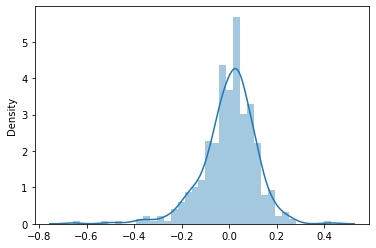

In [1438]:
res = y_train - y_train_pred
sns.distplot(res)

## STEP 5 Predictions and evaluation

In [1439]:
#list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr_2019,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,1,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [1440]:
df_test.describe()

,yr_2019,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.163636,0.177273,0.118182,0.100000,0.127273,0.168182,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.370789,0.382770,0.323559,0.300684,0.334038,0.374881,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1441]:
y_test = df_test.pop('cnt')
X_test = df_test
#add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr_2019,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,1,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,1,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,1,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [1442]:
#remove the columns we dropped in model training

X_test_sm = X_test_sm.drop (['Clear, Few clouds, Partly cloudy, Partly cloudy','Apr','atemp','hum','Feb','July','summer' ,'Dec' ,'Nov','Friday','Thursday','Saturday','Wednesday','Tuesday','holiday'],axis = 1)

In [1443]:
#predict
y_test_pred = lr_2.predict(X_test_sm)
y_test_pred

184    0.357296
535    0.834841
299    0.389493
221    0.537537
152    0.504223
         ...   
702    0.658849
127    0.524341
640    0.699856
72     0.280323
653    0.731816
Length: 220, dtype: float64

In [1444]:
#evaluate

r2_score(y_true = y_test,y_pred = y_test_pred)

0.7432980763515004

<h4> The R2 on train dataset was .744 while on test it is .743 so it is comparable </h4>
So the model is able to generalize what it has leanrt on train dataset.

Text(0, 0.5, 'y_pred')

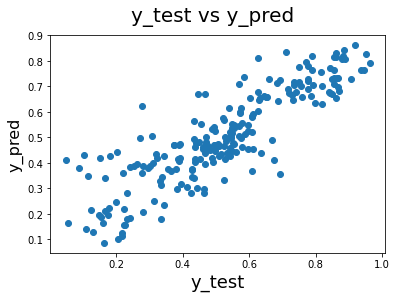

In [1445]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## STEP 6 -- FOLLOWING VARIABLE SELECTION USING RFE - AUTOMATED APPROACH

In [1446]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1447]:
df_train1, df_test1 = train_test_split(bike_rentals, train_size=0.7 , random_state=100)


scaler = MinMaxScaler()

#list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train1[num_vars] = scaler.fit_transform(df_train1[num_vars])
df_train1.head()

y_train1 = df_train1.pop('cnt') # adding target variable
X_train1 = df_train1 # assign predictor variables

In [1448]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

In [1449]:
#ranking and importance of columns
list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('yr_2019', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Apr', False, 2),
 ('Aug', True, 1),
 ('Dec', False, 11),
 ('Feb', False, 9),
 ('July', False, 8),
 ('June', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 10),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Friday', False, 16),
 ('Saturday', False, 14),
 ('Sunday', False, 4),
 ('Thursday', False, 15),
 ('Tuesday', False, 12),
 ('Wednesday', False, 13),
 ('Clear, Few clouds, Partly cloudy, Partly cloudy', True, 1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1)]

In [1450]:
col = X_train1.columns[rfe.support_] # columns that are good
col

Index(['yr_2019', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Aug',
       'June', 'Mar', 'May', 'Sep',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [1451]:
X_train1.columns[~rfe.support_] #columns that are not significant

Index(['holiday', 'workingday', 'summer', 'Apr', 'Dec', 'Feb', 'July', 'Nov',
       'Oct', 'Friday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

<h3> Lets use the statsmodel on the columns selected by RFE </h3>

In [1452]:
X_train1_rfe = X_train1[col] # we are using the cols suggesed by RFE
X_train1_rfe = sm.add_constant(X_train1_rfe)

In [1453]:
lm = sm.OLS(y_train1,X_train1_rfe).fit()

In [1454]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.52e-184
Time:                        17:40:40   Log-Likelihood:                 496.74
No. Observations:                 510   AIC:                            -965.5
Df Residuals:                     496   BIC:                            -906.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

<h3> So the R2 and adjusted R2 are comparable and looks decent <h3>

Lets calculate VIF

In [1455]:

#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train1_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train1_rfe.values, i) for i in range(X_train1_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,127.09
12,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.25
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8.90
2,atemp,2.85
5,spring,2.72
6,winter,2.07
3,hum,1.93
7,Aug,1.51
8,June,1.39
10,May,1.39


Residual Anaysis - Error terms plot

<AxesSubplot:ylabel='Density'>

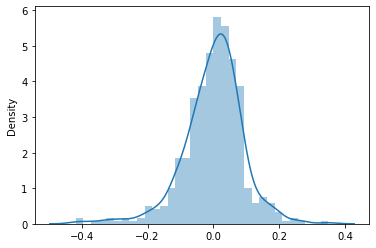

In [1456]:
y_train1_pd = lm.predict(X_train1_rfe)
res = y_train1 - y_train1_pd
sns.distplot(res)

Model Prediction

In [1457]:
# Making inferences
#list of numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

df_test1[num_vars] = scaler.transform(df_test1[num_vars])
df_test1.head()


,yr_2019,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,1,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [1458]:
df_test1.describe()

,yr_2019,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.163636,0.177273,0.118182,0.100000,0.127273,0.168182,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.370789,0.382770,0.323559,0.300684,0.334038,0.374881,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1459]:
y_test1 = df_test1.pop('cnt')
X_test1 = df_test1
#add a constant
X_test1_sm = sm.add_constant(X_test1)
#X_train1.columns[~rfe.support_] #columns that are not significant
X_test1_sm = X_test1_sm.drop(['holiday', 'workingday', 'summer', 'Apr', 'Dec', 'Feb', 'July', 'Nov', 'Oct', 'Friday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],axis=1)

In [1460]:
y_test1_pred = lm.predict(X_test1_sm)

In [1461]:
r2_score (y_true=y_test1,y_pred=y_test1_pred)

0.8200546309995078

Comparable to what we found earlier -- 0.83

Text(0, 0.5, 'y_test1_pred')

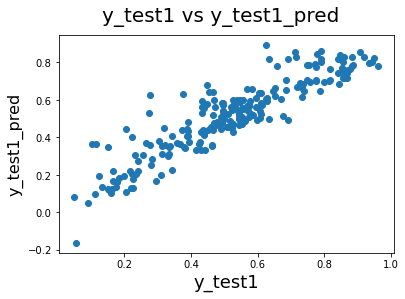

In [1462]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test1,y_test1_pred)
fig.suptitle('y_test1 vs y_test1_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test1', fontsize=18)                          # X-label
plt.ylabel('y_test1_pred', fontsize=16)   